# Import Packages

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Import feat_dict

In [144]:
with open('feat_dict.json') as json_file:
    data = json.load(json_file)
data

{'adult_body_points': ['nose_x',
  'nose_y',
  'head_center_x',
  'head_center_y',
  'ear_left_x',
  'ear_left_y',
  'ear_right_x',
  'ear_right_y',
  'neck_x',
  'neck_y',
  'side_left_x',
  'side_left_y',
  'side_right_x',
  'side_right_y',
  'body_center_x',
  'body_center_y',
  'hip_left_x',
  'hip_left_y',
  'hip_right_x',
  'hip_right_y',
  'tailbase_x',
  'tailbase_y',
  'tail_tip_x',
  'tail_tip_y',
  'tail_center_x',
  'tail_center_y',
  'tail_upper_x',
  'tail_upper_y',
  'tail_lower_x',
  'tail_lower_y'],
 'adult_body_prob': ['nose_p',
  'head_center_p',
  'ear_left_p',
  'ear_right_p',
  'neck_p',
  'side_left_p',
  'side_right_p',
  'body_center_p',
  'hip_left_p',
  'hip_right_p',
  'tailbase_p',
  'tail_tip_p',
  'tail_center_p',
  'tail_upper_p',
  'tail_lower_p'],
 'infant_and_nest_points': ['Infant1_head_x',
  'Infant1_head_y',
  'Infant1_middle_head_x',
  'Infant1_middle_head_y',
  'Infant1_middle_tail_x',
  'Infant1_middle_tail_y',
  'Infant1_tail_x',
  'Infant1_tai

# Import feature dataframes

In [3]:
%%time
# Define feature directory
features_directory = 'targets_inserted'
file_location = os.path.join(features_directory, '*.csv')

# create list of filenames for every video to be processed
# this list is the input for the video processing function
filenames = glob.glob(file_location)
videoname = []
for f in filenames:
    # establish name for output file from the input filename
    x = os.path.split(f)
    x = f
    videoname.append(x)
videoname

Wall time: 0 ns


['targets_inserted\\Gal_35_father_retreive_trial_1.csv',
 'targets_inserted\\Gal_37_father_retreive_trial_1.csv',
 'targets_inserted\\Ucn3_50_father_retreive_trial_1.csv',
 'targets_inserted\\Ucn3_52_mother_retreive_trial_1.csv',
 'targets_inserted\\Ucn3_53_mother_retreive_trial_1.csv']

In [9]:
%%time
# Read in the csv file for each feature dataframe
dfs = []
for x in videoname:
    filepath = x
    features = pd.read_csv(filepath)
    dfs.append(features)
    
df_concat = pd.concat(dfs)
df_cat = df_cat[data['adult_body_prob']]

Wall time: 1min 24s


# Likelihood plots

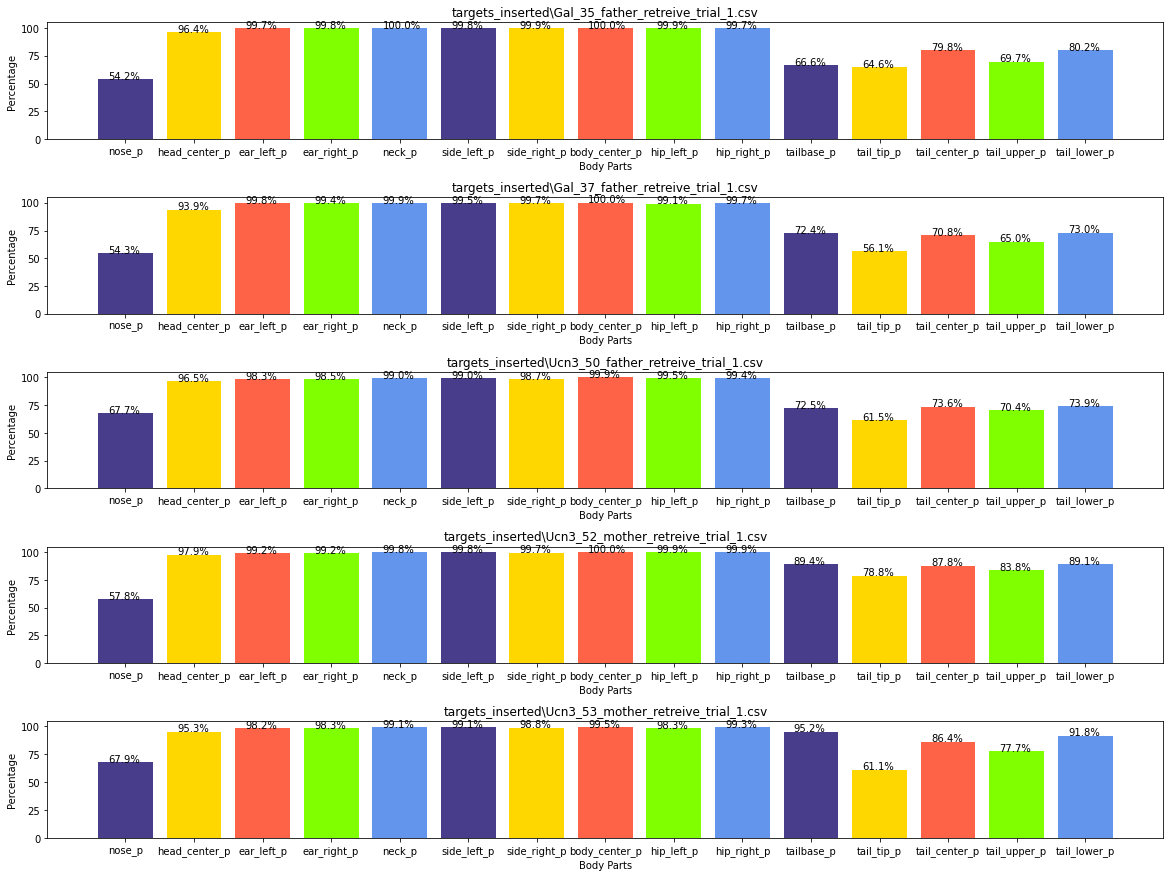

In [146]:
# Make plots for each body point of the adult for each video, in which a bar graph is plotted for the percentage of
# frames in the video for which a certain bodypart is above a threshold (90)
plt.subplots(5, 1, sharey=True, figsize=(20, 15))
count = 1
for i in range(len(dfs)):
    df_cat = dfs[i]
    df_cat = df_cat[data['adult_body_prob']]
    percentages = []
    for column in df_cat.columns:
        prob = df_cat[column].loc[df_cat[column] > 0.9] 
        percentage = float("%.1f" % (len(prob) / len(df_cat[column]) * 100))
        percentages.append(percentage)
    plt.subplot(5, 1, count)
    plt.bar(df_cat.columns, percentages,
            color=['darkslateblue', 'gold', 'tomato', 'chartreuse', 'cornflowerblue'])
    plt.ylabel('Percentage')
    plt.xlabel('Body Parts')
    plt.title(videoname[i])
    xlocs, xlabs = plt.xticks()
    for i, v in enumerate(percentages):
        plt.text(xlocs[i] - 0.25, v + 0.01, str(v) + '%')
    count += 1
plt.subplots_adjust(hspace=0.5)

# Box and whisker plots

       nose_to_head_center  nose_to_ear_left  nose_to_ear_right    nose_p
0                 0.720311          1.944876           1.298267  0.052726
1                 0.822933          2.070490           1.348491  0.057816
2                 0.823044          2.070432           1.348250  0.058148
3                 0.840642          2.112067           1.320430  0.094078
4                 0.843678          2.113358           1.328352  0.093336
...                    ...               ...                ...       ...
12000             1.186905          2.471563           2.498576  0.999825
12001             1.193910          2.482568           2.498306  0.999830
12002             1.248289          2.491624           2.502113  0.999827
12003             1.249160          2.488216           2.492859  0.999753
12004             1.249160          2.488216           2.492859  0.999753

[97224 rows x 4 columns]


Text(0.5, 1.0, 'Distances w/ p > 0.1')

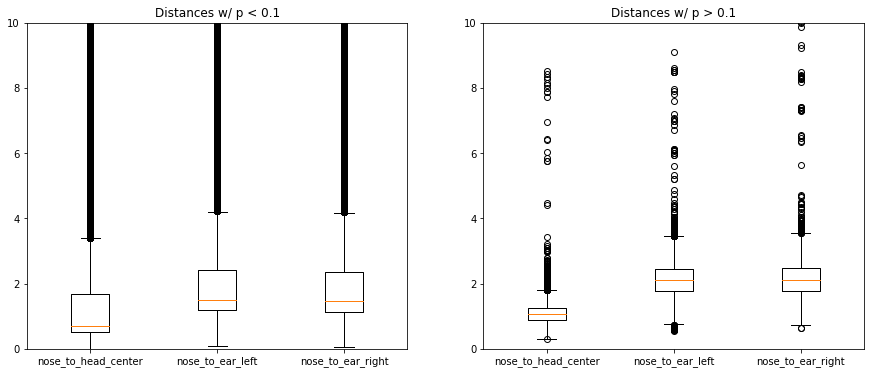

In [108]:
# Make box and whisker plot of the listed euclidean distances below, in which the spread of values in the entire
# loaded dataset is represented
# One plot is made for the frames in which the probability of the adult's nose point is below 0.1 and one in which
# the same probability is above 0.1
columns=['nose_to_head_center', 'nose_to_ear_left',
                    'nose_to_ear_right','nose_p']
df_nose = df_concat[columns]
print(df_nose)
below_threshold = df_nose.loc[df_nose['nose_p'] < 0.1] 
above_threshold = df_nose.loc[df_nose['nose_p'] > 0.1] 
below_threshold = below_threshold.drop(['nose_p'], axis=1)
above_threshold = above_threshold.drop(['nose_p'], axis=1)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
data_bt = []
data_at = []
for column in below_threshold.columns:
    data_bt.append(below_threshold[column])
    data_at.append(above_threshold[column])


plt.subplot(1, 2, 1)
plt.boxplot(data_bt)
plt.xticks([1, 2, 3], below_threshold.columns)
plt.ylim([0,10])
plt.title('Distances w/ p < 0.1')

plt.subplot(1, 2, 2)
plt.boxplot(data_at)
plt.xticks([1, 2, 3], above_threshold.columns)
plt.ylim([0,10])
plt.title('Distances w/ p > 0.1')

In [127]:
# Reassign the nose probability in frames when it is below 0.1 so that it equals 0.912345 (a recognizable value
# if needed to be used later)
columns = ['nose_to_head_center', 'nose_to_ear_left',
                    'nose_to_ear_right', 'nose_x', 'nose_y', 'nose_p']
nose_change = df_concat[columns]
nose_change = nose_change.reset_index()
print(nose_change)
nose_ma = nose_change.rolling(30, min_periods=1).mean()
for i in range(len(nose_change)):
    if nose_change['nose_p'][i] < 0.1:
        nose_change['nose_to_head_center'][i] = nose_ma.at[i, 'nose_to_head_center']
        nose_change['nose_to_ear_left'][i] = nose_ma.at[i, 'nose_to_ear_left']
        nose_change['nose_to_ear_right'][i] = nose_ma.at[i, 'nose_to_ear_right']
        nose_change['nose_x'][i] = nose_ma.at[i, 'nose_x']
        nose_change['nose_y'][i] = nose_ma.at[i, 'nose_y']
        nose_change['nose_p'][i] = 0.912345
nose_change

       index  nose_to_head_center  nose_to_ear_left  nose_to_ear_right  \
0          0             0.720311          1.944876           1.298267   
1          1             0.822933          2.070490           1.348491   
2          2             0.823044          2.070432           1.348250   
3          3             0.840642          2.112067           1.320430   
4          4             0.843678          2.113358           1.328352   
...      ...                  ...               ...                ...   
97219  12000             1.186905          2.471563           2.498576   
97220  12001             1.193910          2.482568           2.498306   
97221  12002             1.248289          2.491624           2.502113   
97222  12003             1.249160          2.488216           2.492859   
97223  12004             1.249160          2.488216           2.492859   

           nose_x      nose_y    nose_p  
0      259.563995  248.680832  0.052726  
1      261.835449  246.6603

<ipython-input-127-bb764354e01e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nose_change['nose_to_head_center'][i] = nose_ma.at[i, 'nose_to_head_center']
<ipython-input-127-bb764354e01e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nose_change['nose_to_ear_left'][i] = nose_ma.at[i, 'nose_to_ear_left']
<ipython-input-127-bb764354e01e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nose_change['nose_to_ear_right'][i] = nose_

,index,nose_to_head_center,nose_to_ear_left,nose_to_ear_right,nose_x,nose_y,nose_p
0,0,0.720311,1.944876,1.298267,259.563995,248.680832,0.912345
1,1,0.771622,2.007683,1.323379,260.699722,247.670609,0.912345
2,2,0.788763,2.028599,1.331669,261.079152,247.336543,0.912345
3,3,0.801733,2.049466,1.328859,261.729614,247.133423,0.912345
4,4,0.810122,2.062245,1.328758,262.106177,246.994141,0.912345
...,...,...,...,...,...,...,...
97219,12000,1.186905,2.471563,2.498576,319.167633,320.795074,0.999825
97220,12001,1.193910,2.482568,2.498306,319.145203,320.999146,0.999830
97221,12002,1.248289,2.491624,2.502113,319.108429,321.189758,0.999827
97222,12003,1.249160,2.488216,2.492859,319.060028,321.130524,0.999753


       nose_to_head_center  nose_to_ear_left  nose_to_ear_right    nose_p
0                 0.720311          1.944876           1.298267  0.912345
1                 0.771622          2.007683           1.323379  0.912345
2                 0.788763          2.028599           1.331669  0.912345
3                 0.801733          2.049466           1.328859  0.912345
4                 0.810122          2.062245           1.328758  0.912345
...                    ...               ...                ...       ...
97219             1.186905          2.471563           2.498576  0.999825
97220             1.193910          2.482568           2.498306  0.999830
97221             1.248289          2.491624           2.502113  0.999827
97222             1.249160          2.488216           2.492859  0.999753
97223             1.249160          2.488216           2.492859  0.999753

[97224 rows x 4 columns]


Text(0.5, 1.0, 'Distances w/ p > 0.9')

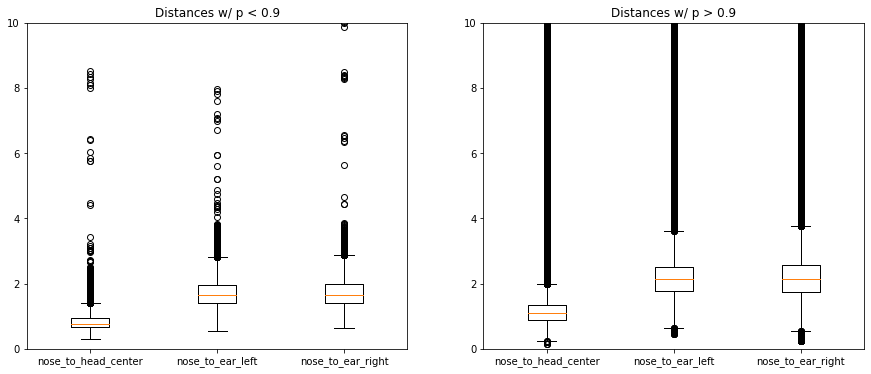

In [128]:
# Make the same box an whisker plot as before but with the reassigned frames (the ones that used to be below 0.1 will
# now be above 0.9)
df_nose = nose_change.drop(['nose_x', 'nose_y', 'index'], axis=1)
print(df_nose)
below_threshold = df_nose.loc[df_nose['nose_p'] < 0.9] 
above_threshold = df_nose.loc[df_nose['nose_p'] > 0.9] 
below_threshold = below_threshold.drop(['nose_p'], axis=1)
above_threshold = above_threshold.drop(['nose_p'], axis=1)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
data_bt = []
data_at = []
for column in below_threshold.columns:
    data_bt.append(below_threshold[column])
    data_at.append(above_threshold[column])


plt.subplot(1, 2, 1)
plt.boxplot(data_bt)
plt.xticks([1, 2, 3], below_threshold.columns)
plt.ylim([0,10])
plt.title('Distances w/ p < 0.9')

plt.subplot(1, 2, 2)
plt.boxplot(data_at)
plt.xticks([1, 2, 3], above_threshold.columns)
plt.ylim([0,10])
plt.title('Distances w/ p > 0.9')